In [1]:
# LOADING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)


# STEP 1 : UNDERSTANDING DATA

In [4]:
# LOADING DATASET
df=pd.read_csv('/Users/preetish/Downloads/UTM shared document/Iris.csv')

In [6]:
# DATA UNDERSTANDING
df.shape
# we got to know we have 150 rows and 6 columns 

(150, 6)

In [8]:
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
# lets see the name of all columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# getting the datatype of every column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# STEP 2: DATA PREPRATION


In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# lets check for missing values in our data
df.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
# lets see if any of our rows is duplicated or not
df.loc[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


# STEP 3 : FEATURE UNDERSTANDING

In [30]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0, 0.5, 'COUNT')

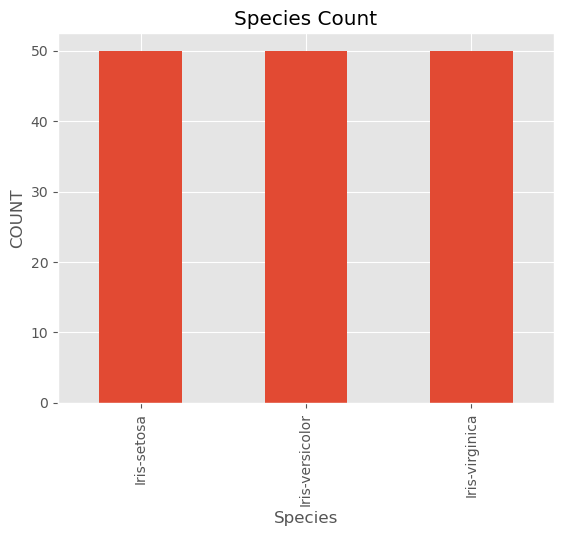

In [45]:
ax=df["Species"].value_counts().plot(kind='bar',title='Species Count')
ax.set_ylabel('COUNT')

Text(0.5, 0, 'Sepal Length(cm)')

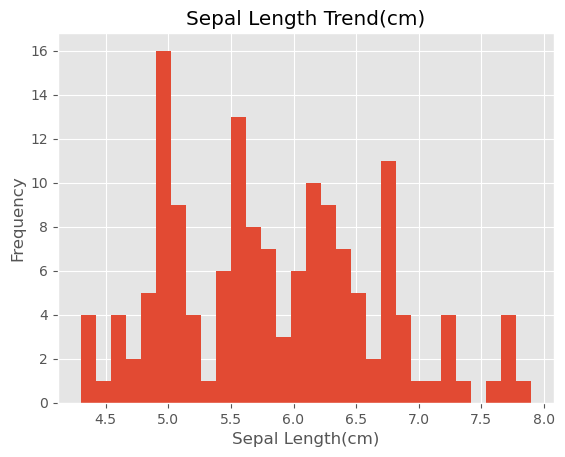

In [69]:
ax=df['SepalLengthCm'].plot(kind='hist',bins=30,title='Sepal Length Trend(cm)')
ax.set_xlabel('Sepal Length(cm)')

Text(0.5, 0, 'Sepal Length(cm)')

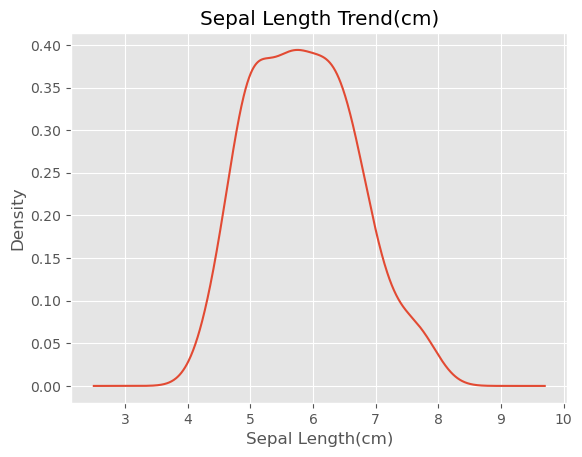

In [71]:
ax=df['SepalLengthCm'].plot(kind='kde',title='Sepal Length Trend(cm)')
ax.set_xlabel('Sepal Length(cm)')

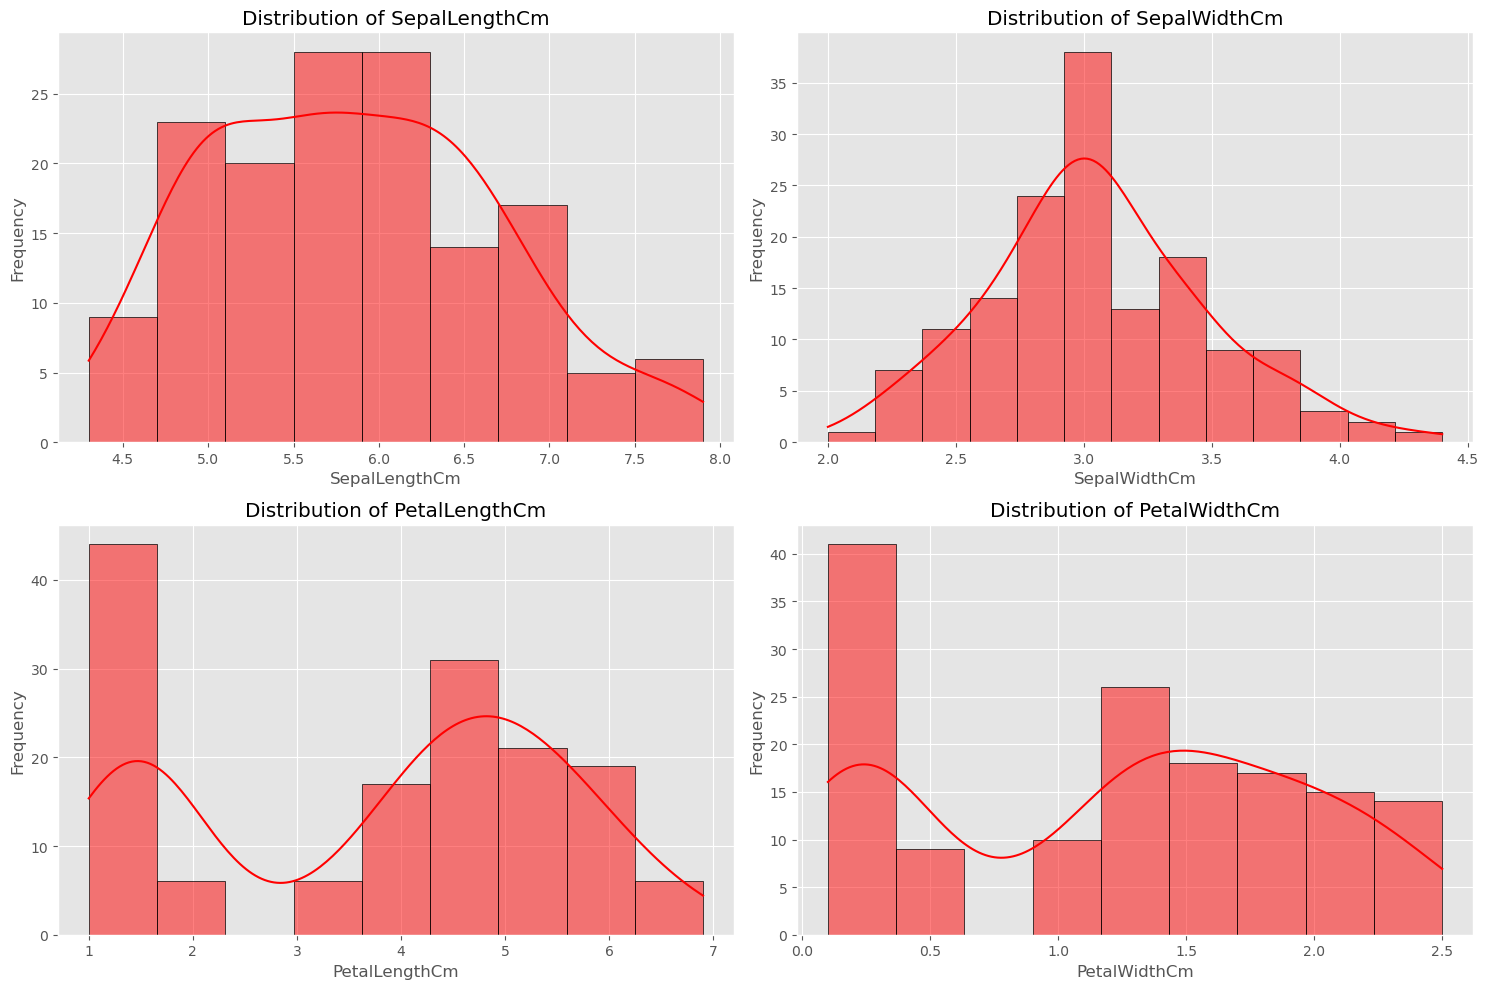

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns, excluding 'Id'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'Id']

# Set up the plot
plt.figure(figsize=(15, 5 * ((len(numeric_columns) + 1) // 2)))

for i, feature in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 1) // 2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='red', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# STEP 4: FEATURE RELATIONSHIPS

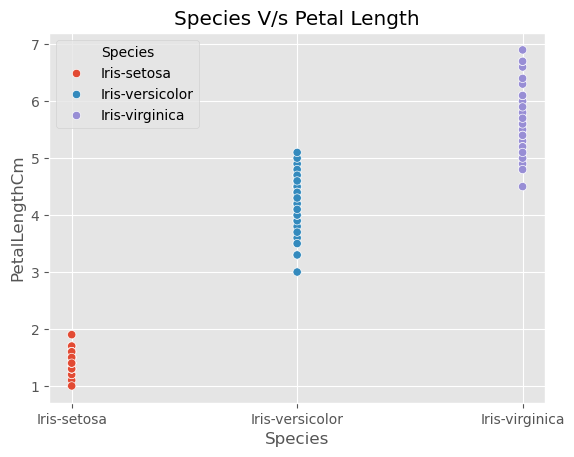

In [109]:
ax=sns.scatterplot(x='Species',y='PetalLengthCm',hue='Species',data=df)
ax.set_title('Species V/s Petal Length')
plt.show()

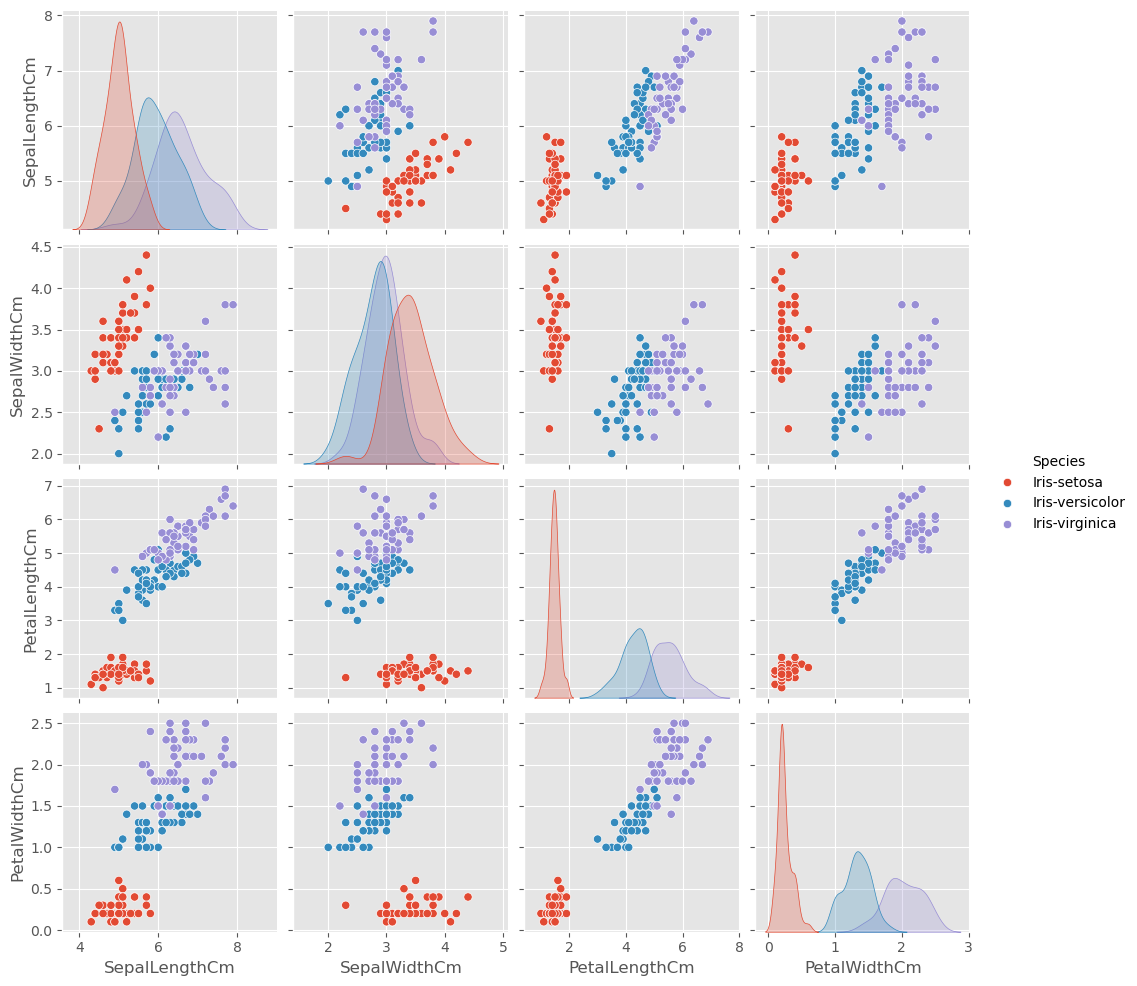

In [115]:
# lets use pairplot feature to compare all the features among each other
sns.pairplot(df,vars=['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm','PetalWidthCm'],hue='Species')
plt.show()

In [121]:
# checking co-relation between entities 
df_corr=df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm','PetalWidthCm']].corr()
df_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


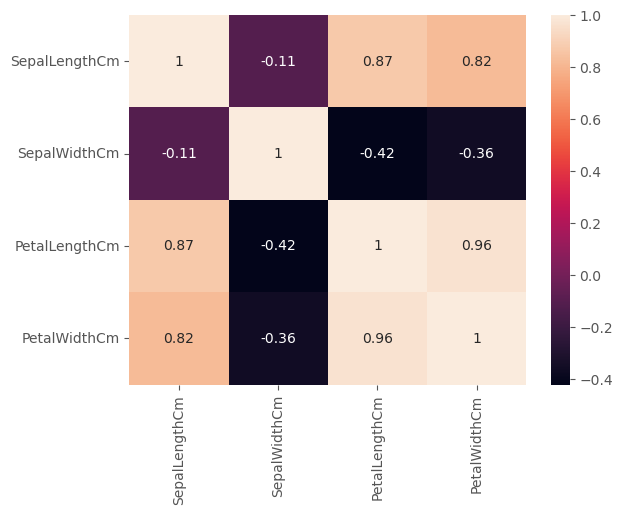

In [127]:
# using heatmap to look at it in different ways
sns.heatmap(df_corr,annot=True)
plt.show()